In [128]:
from tabula import read_pdf
from tabulate import tabulate
import os
import json
import logging

In [129]:
df = read_pdf("./../pdfs/OPE1275H.pdf", pages = "3")
df = df[2].dropna(axis=1, how='all')
df

,SYMBOL PARAMETER,MIN,TYP,MAX,UNITS,TEST CONDITIONS
0,VCC Supply Voltage,4.5,5.0,5.5,V,NaN
1,ICC Supply Current,-,21,27,mA,VCC = 5.0 volts
2,VOH High Level Output Voltage,Vcc-0.5,-,-,V,IC = 100 μA
3,VOL Low Level Output Voltage,-,-,0.4,V,IC = 20 mA
4,TR Rise Time,-,500,-,ns,"10% to 90%, VCC = 5.0 volts"
5,TF Fall Time,-,100,-,ns,"10% to 90%, VCC = 5.0 volts"
6,FR Frequency Response,-,-,60,kHz,NaN
7,H.S. Hole Size,0.10,-,-,inch,NaN
8,Maximum speed of rotation with 1024,NaN,NaN,NaN,NaN,NaN
9,Rotation,-,-,100,rev/sec,NaN


In [130]:
# Replace 'your_pdf_file.pdf' with the actual path to your PDF file
pdf_file_path = 'OPE1275H.pdf'

# Extract the filename without the extension
elec_component = os.path.splitext(os.path.basename(pdf_file_path))[0]

print(elec_component)

OPE1275H


In [131]:
#Data Cleaning

df = read_pdf("./../pdfs/OPE1275H.pdf", pages = "3")
df = df[2].dropna(axis=1, how='all')
df[['SYMBOL', 'PARAMETER']] = df['SYMBOL PARAMETER'].str.split(n=1,expand=True)
df = df.drop(columns=['SYMBOL PARAMETER'])
df = df.drop(index=range(11,15))
df.loc[8, 'PARAMETER'] = df.loc[8, 'SYMBOL'] + ' ' + df.loc[8, 'PARAMETER']
df.loc[10, 'PARAMETER'] = df.loc[10, 'SYMBOL'] + ' ' + df.loc[10, 'PARAMETER']
df.loc[8, 'PARAMETER'] = df.loc[8, 'PARAMETER'] + ' ' + df.loc[10, 'PARAMETER']
df.loc[8, 'SYMBOL'] = df.loc[9, 'SYMBOL']
df.loc[8, 'MIN'] = df.loc[9, 'MIN']
df.loc[8, 'TYP'] = df.loc[9, 'TYP']
df.loc[8, 'MAX'] = df.loc[9, 'MAX']
df.loc[8, 'UNITS'] = df.loc[9, 'UNITS']
df.loc[8, 'TEST CONDITIONS'] = df.loc[9, 'TEST CONDITIONS']
df = df.drop(index=range(9,11))
df['COMPONENT NAME'] = elec_component
df = df[['COMPONENT NAME', 'SYMBOL', 'PARAMETER', 'MIN', 'TYP', 'MAX', 'UNITS', 'TEST CONDITIONS']]
df

,COMPONENT NAME,SYMBOL,PARAMETER,MIN,TYP,MAX,UNITS,TEST CONDITIONS
0,OPE1275H,VCC,Supply Voltage,4.5,5.0,5.5,V,NaN
1,OPE1275H,ICC,Supply Current,-,21,27,mA,VCC = 5.0 volts
2,OPE1275H,VOH,High Level Output Voltage,Vcc-0.5,-,-,V,IC = 100 μA
3,OPE1275H,VOL,Low Level Output Voltage,-,-,0.4,V,IC = 20 mA
4,OPE1275H,TR,Rise Time,-,500,-,ns,"10% to 90%, VCC = 5.0 volts"
5,OPE1275H,TF,Fall Time,-,100,-,ns,"10% to 90%, VCC = 5.0 volts"
6,OPE1275H,FR,Frequency Response,-,-,60,kHz,NaN
7,OPE1275H,H.S.,Hole Size,0.10,-,-,inch,NaN
8,OPE1275H,Rotation,Maximum speed of rotation with 1024 holes per ...,-,-,100,rev/sec,NaN


In [132]:
data_csv = df.to_csv(index=False)
data_csv

'COMPONENT NAME,SYMBOL,PARAMETER,MIN,TYP,MAX,UNITS,TEST CONDITIONS\nOPE1275H,VCC,Supply Voltage,4.5,5.0,5.5,V,\nOPE1275H,ICC,Supply Current,-,21,27,mA,VCC = 5.0 volts\nOPE1275H,VOH,High Level Output Voltage,Vcc-0.5,-,-,V,IC = 100 μA\nOPE1275H,VOL,Low Level Output Voltage,-,-,0.4,V,IC = 20 mA\nOPE1275H,TR,Rise Time,-,500,-,ns,"10% to 90%, VCC = 5.0 volts"\nOPE1275H,TF,Fall Time,-,100,-,ns,"10% to 90%, VCC = 5.0 volts"\nOPE1275H,FR,Frequency Response,-,-,60,kHz,\nOPE1275H,H.S.,Hole Size,0.10,-,-,inch,\nOPE1275H,Rotation,Maximum speed of rotation with 1024 holes per rotation,-,-,100,rev/sec,\n'

In [133]:
dummy_data = """COMPONENT NAME,SYMBOL,PARAMETER,MIN,TYP,MAX,UNITS,TEST CONDITIONS
XYZ1234A,VDD,Supply Voltage,3.3,3.5,3.7,V,
XYZ1234A,IDD,Supply Current,-,15,20,mA,VDD = 3.5 volts
XYZ1234A,VOUT,Output Voltage,0.1,2.5,4.9,V,Load = 10 mA
XYZ1234A,IOH,High Level Output Current,-,5,10,mA,VOUT = 4.0 V
XYZ1234A,IOL,Low Level Output Current,-,8,15,mA,VOUT = 0.5 V
XYZ1234A,TPD,Propagation Delay,-,2,5,ns,VDD = 3.5 V
XYZ1234A,TJ,Operating Temperature Range,-40,25,85,°C,
XYZ1234A,PD,Power Dissipation,-,150,200,mW,
XYZ1234A,THD,Total Harmonic Distortion,-,-,0.1,%,
XYZ1234A,VS,Supply Voltage Sensitivity,0.01,-,0.1,%/V,"""

In [134]:
# Reading prompts from files
def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            file_content = file.read()
            return file_content
    except FileNotFoundError:
        print(f"The file at path '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
file1_path = "./../prompts/input.txt"
file2_path = "./../prompts/output.txt"
file3_path = "./../prompts/system.txt"

input_prompt = read_file(file1_path)
ouput_prompt = read_file(file2_path)
system_prompt = read_file(file3_path)

# Now, content1, content2, and content3 contain the content of the respective files
if input_prompt is not None:
    print(f"Content of file 1:\n{input_prompt}")

if ouput_prompt is not None:
    print(f"Content of file 2:\n{ouput_prompt}")

if system_prompt is not None:
    print(f"Content of file 3:\n{system_prompt}")


Content of file 1:
input_prompt = """Based on the following example, extract entities and relations from the provided specification.

Use the following entity types:
{entity_types}

Use the following relation types:
{relation_types}

# specification
COMPONENT NAME,SYMBOL,PARAMETER,MIN,TYP,MAX,UNITS,TEST CONDITIONS
OPE1275H,VCC,Supply Voltage,4.5,5.0,5.5,V,
OPE1275H,ICC,Supply Current,-,21,27,mA,VCC = 5.0 volts
OPE1275H,VOH,High Level Output Voltage,Vcc-0.5,-,-,V,IC = 100 μA
OPE1275H,VOL,Low Level Output Voltage,-,-,0.4,V,IC = 20 mA
OPE1275H,TR,Rise Time,-,500,-,ns,"10% to 90%, VCC = 5.0 volts"
OPE1275H,TF,Fall Time,-,100,-,ns,"10% to 90%, VCC = 5.0 volts"
OPE1275H,FR,Frequency Response,-,-,60,kHz
OPE1275H,H.S.,Hole Size,0.10,-,-,inch
OPE1275H,Rotation,Maximum speed of rotation with 1024 holes per rotation,-,-,100,rev/sec
"""
Content of file 2:
output_prompt = """
# Output in JSON triplets
[
  {{
    "head":"OPE1275H",
    "relation":"part_of",
    "tail":"hardware_component"
  }},
  {{

In [177]:
import vertexai
from vertexai import language_models

project_id = "modular-glider-408308"
location = "us-central1"

def extract_triplets(project_id: str, location: str, data: str) -> str:
    """Extract Triplets with a Large Language Model."""

    vertexai.init(project=project_id, location=location)

    chat_model = language_models.ChatModel.from_pretrained("chat-bison")

    parameters = {
        "temperature": 0.8,
        "max_output_tokens": 2048,
        "top_p": 0.95,
        "top_k": 40,
    }

    chat = chat_model.start_chat(
        context=system_prompt,#add our system_prompt
        examples=[
            language_models.InputOutputTextPair(
                input_text=input_prompt,#add input data example
                output_text=output_prompt,#add output we expect
            ),
        ],
    )

    responses = chat.send_message_streaming(
        message=data,#provide our own data
        **parameters,
    )

    results = []
    for response in responses:
        #print(response.candidates[0].text)
        results.append(str(response.candidates[0].text))
    results = "".join(results)
    return results

#if __name__ == "__main__":
#    extract_triplets(project_id, location, dummy_data)

In [180]:
json_data = extract_triplets(project_id, location, dummy_data)
json_data = json_data.replace('json', '').replace('```', '').strip()
file_path = "./../ExtractedTriplets/output.json"

# Write the JSON data to the file
with open(file_path, 'w') as json_file:
    json.dump(json_data, json_file)

print(f"JSON data has been successfully saved to {file_path}")

JSON data has been successfully saved to ./../ExtractedTriplets/output.json


In [197]:
# Specify the path to the JSON file
file_path = "./../ExtractedTriplets/output.json"

# Read the JSON file into a Python object
with open(file_path, 'r') as json_file:
    json_data = json.load(json_file)
    
kg_relations = pd.DataFrame(json_data_list)
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(kg_relations)

                           head                     relation                         tail
0                      XYZ1234A                      part_of           hardware_component
1                      XYZ1234A                 has_property               supply voltage
2                supply voltage            hasNumericalValue                          3.5
3                supply voltage  hasLowerBoundNumericalValue                          3.3
4                supply voltage  hasUpperBoundNumericalValue                          3.7
5                supply voltage                     has_unit                            V
6                      XYZ1234A                 has_property               supply current
7                supply current            hasNumericalValue                           15
8                supply current  hasUpperBoundNumericalValue                           20
9                supply current                     has_unit                           mA
10        

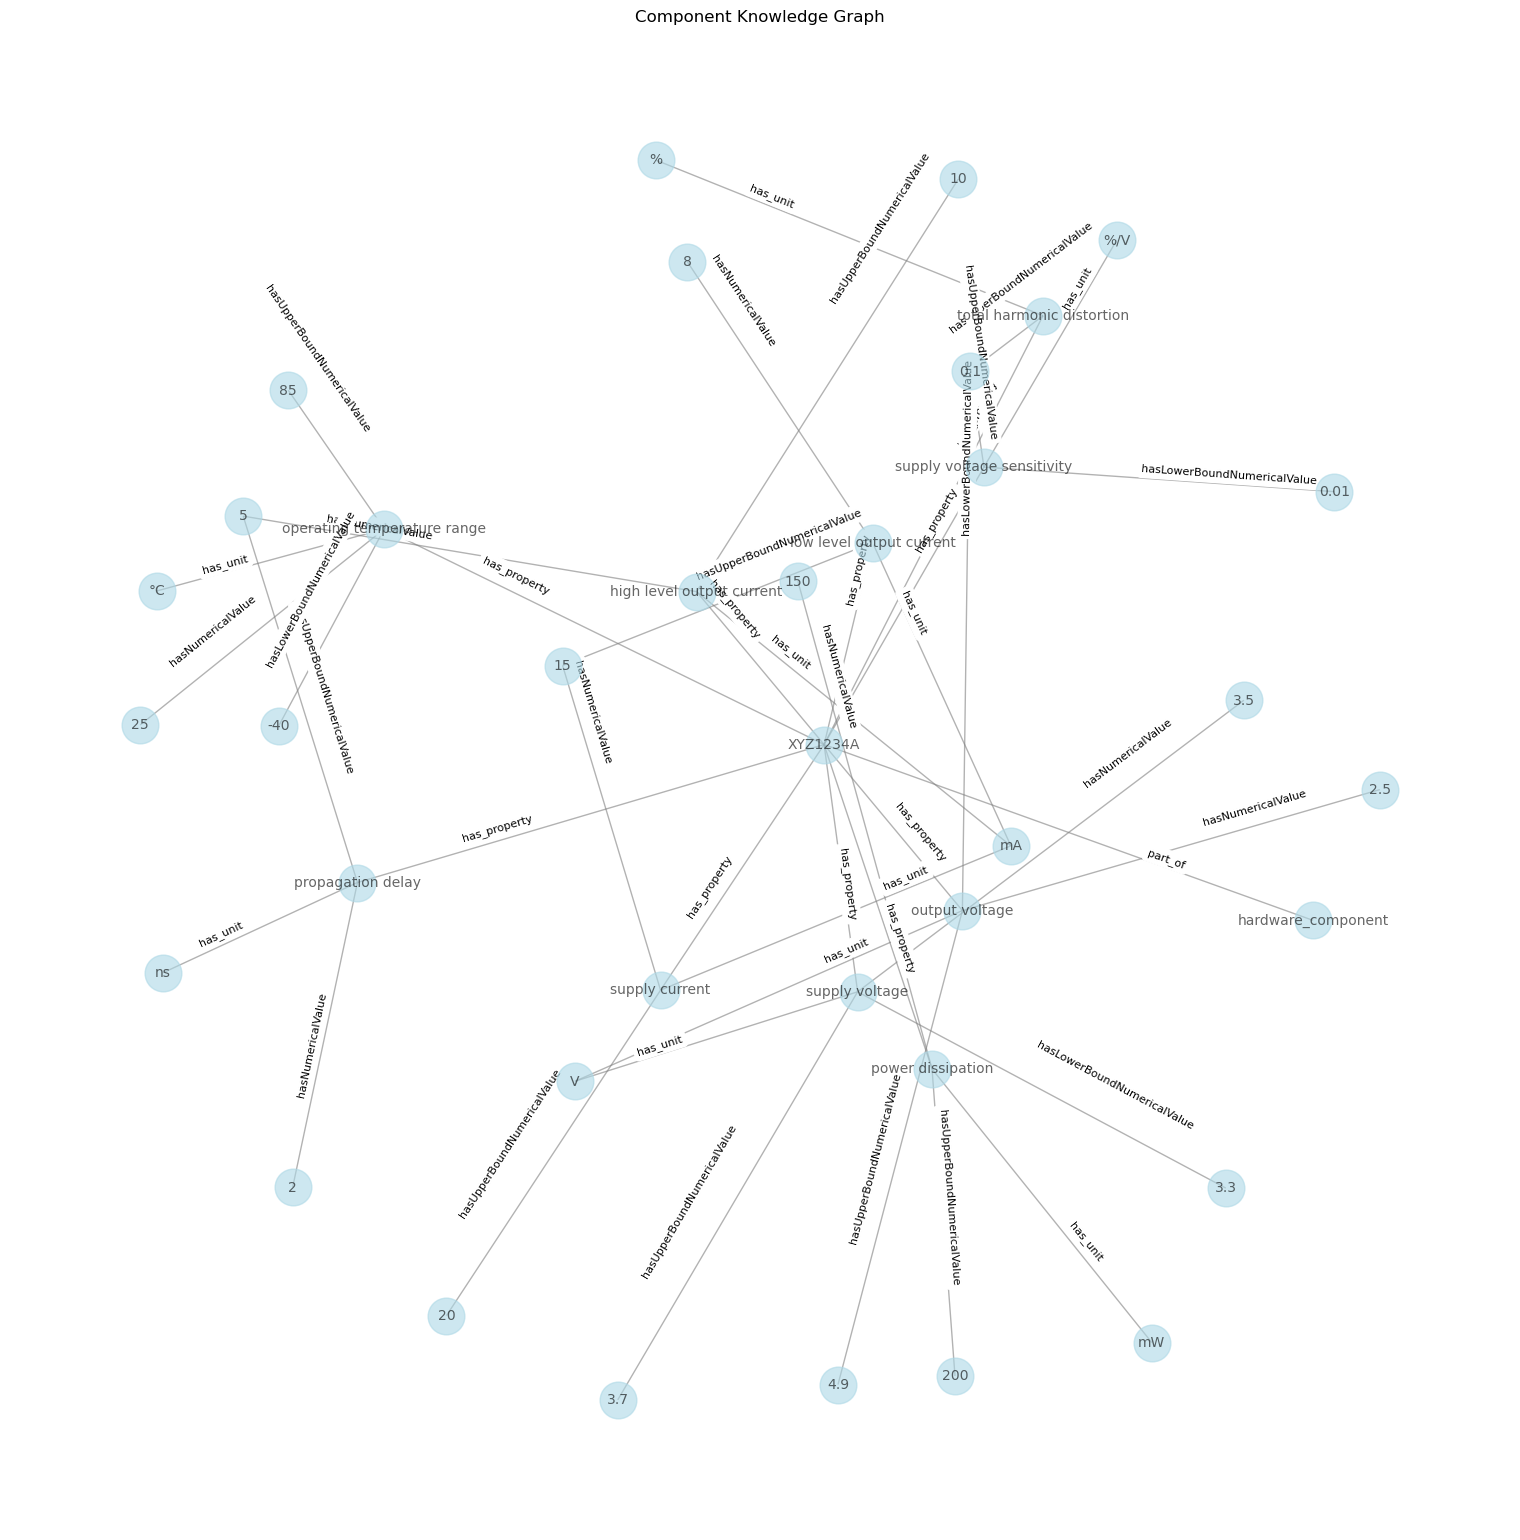

In [206]:
#Printing the KG

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for _, row in kg_relations.iterrows():
    G.add_edge(row['head'], row['tail'], label=row['relation'])
    
pos = nx.spring_layout(G, seed=47, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Component Knowledge Graph')
plt.show()